# Brasileirão Championship - A study case of football scores matches predction
------

## CONTENT:
- [Introduction to the problem](#Introduction-to-the-problem)
- [Dataset's features](#Dataset's-features)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Dealing with categorical features](#Dealing-with-categorical-features)
- [Taking a look at the models](#Taking-a-look-at-the-models)
    - [Train and Test some models](#Train-and-Test-some-models)
- [Feature Engineering](#Feature-Engineering-%2F-Feature-Selection)
- [Final model evaluation and selection](#Final-model-evaluation-and-selection)
- [Conclusion](#Conclusion)
    - [How we could improve the model](#How-improve-the-model%3F)
___

## Introduction to the problem


First of all, this problem was brought by __[Data Science Brigade](https://datasciencebr.com/) pratical test for the Data Scientist Job__. Felipe asked , as a test, to use [Brasileirão Championship open database](https://github.com/openfootball/br-brazil/) from 2003 to 2017, to create a model to predict 2017 game results scores.

As our target is the __game score result__, is a multioutput regression problem and I'm going to attack this problem with this approach.

_Note: 2016 date feature was missing. To solve the problem, I repeated 2015 date._
___

## Dataset's features

On this section I'm going to explain about our datasets features and targets:
- __Round__: Is referent to the Brasileirão championship rounds, where all teams play one time each round. Actually the championship have 38 rounds, but already had year with more than 40.
    - __Data Type__: _Integer_
- __Date__: Date when the game ocurred.
    - __Data Type__: _Datetime_
- __Day of week__: The day of the week which the game ocurred.
    - __Data Type__: _String_
- __Team 1__: The football team that is playing at the "home stadium".
    - __Data Type__: _String_
- __Team 2__: The football team that is playing at the "opponent's stadium".
    - __Data Type__: _String_
- __Goal 1__: How many goals Team 1 did in the game.
    - __Data Type__: _Integer_
- __Goal 2__: How many goals Team 2 did in the game.
    - __Data Type__: _Integer_
___

## Exploratory Data Analysis (EDA)

First, I will install all the libraries I'm gonna use in our application.

__Advise__: _If you run this cell, these ```pip install``` commands will run on your terminal_.

In [46]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install numpy

After this, some imports:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# For ignore warnings' logs:
warnings.filterwarnings('ignore')

# For a beauty output of dataframe table:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Now let's take a look at our datasets:

In [3]:
# Train data is a DataFrame with data from 2003 until 2016
train_data = pd.read_csv('datasets/resultados-brasileirao - 2003-2016.csv')
# Test data is a DataFrame with data from 2017
test_data = pd.read_csv('datasets/resultados-brasileirao - 2017.csv')
#Shows the first 5 rows of our DataFrame
train_data.head()
test_data.head()

,round,date,day_of_week,team_1,team_2,goal_1,goal_2
0,1,29/03/2003,Sábado,Guarani,Vasco,4,2
1,1,29/03/2003,Sábado,Atlético PR,Grêmio,2,0
2,1,30/03/2003,Domingo,Flamengo,Coritiba,1,1
3,1,30/03/2003,Domingo,Goiás,Paysandu,2,2
4,1,30/03/2003,Domingo,Internacional,Ponte Preta,1,1


,round,date,day_of_week,team_1,team_2,goal_1,goal_2
0,1,13/05/2017,Sábado,Flamengo,Atlético,1,1
1,1,13/05/2017,Sábado,Corinthians,Chapecoense,1,1
2,1,14/05/2017,Domingo,Fluminense,Santos,3,2
3,1,14/05/2017,Domingo,Palmeiras,Vasco,4,0
4,1,14/05/2017,Domingo,Cruzeiro,São Paulo,1,0


### Checking team names

In [49]:
# Checking all teams of the dataset
train_data.team_1.unique() # unique() method return a list of distinct elements in this column
test_data.team_1.unique()

array(['Guarani', 'Atlético PR', 'Flamengo', 'Goiás', 'Internacional',
       'Criciúma', 'Juventude', 'Fortaleza', 'Cruzeiro', 'Vitória',
       'Santos', 'Corinthians', 'Fluminense', 'Atlético MG', 'Coritiba',
       'Grêmio', 'Bahia', 'Figueirense', 'Paysandu', 'Ponte Preta',
       'Paraná', 'São Caetano', 'São Paulo', 'Vasco', 'Botafogo',
       'Palmeiras', 'VItória', 'Gr', 'Bota', 'Brasiliense', 'Santa Cruz',
       'América RN', 'Sport', 'Náutico', 'Ipatinga', 'Portuguesaa',
       'Avaí', 'Santo André', 'Barueri', 'Atlético GO', 'Ceará',
       'Grêmio Prudente', 'América MG', 'Portuguesa', 'Goías',
       'Chapecoense', 'Joinvile', 'Vitória BA'], dtype=object)

array(['Flamengo', 'Corinthians', 'Fluminense', 'Palmeiras', 'Cruzeiro',
       'Bahia', 'Ponte Preta', 'Avaí', 'Grêmio', 'Coritiba', 'Santos',
       'Atlético', 'Chapecoense', 'Vasco', 'Vitória', 'Botafogo', 'Sport',
       'São Paulo', 'Atlético GO', 'Atlético MG', 'Atlético PR',
       'Altético MG', 'Altético PR', 'Altético GO'], dtype=object)

The team _Atlético_ is noisy data, because there are 3 categories of Atlético's team. Let's remove:

In [50]:
# Masking by the columns team_1 and team_2 which don't have string 'Atlético':
test_data = test_data[~test_data.team_1.str.contains("Atlético")]
test_data = test_data[~test_data.team_2.str.contains("Atlético")]

test_data.team_1.unique()

array(['Corinthians', 'Fluminense', 'Palmeiras', 'Cruzeiro',
       'Ponte Preta', 'Avaí', 'Grêmio', 'Santos', 'Chapecoense', 'Vasco',
       'Vitória', 'Botafogo', 'Sport', 'São Paulo', 'Flamengo',
       'Coritiba', 'Bahia', 'Altético MG', 'Altético PR', 'Altético GO'],
      dtype=object)

Done! There isn't team _Atlético_ now.

## Out of mere curiosity

How many different teams played Brasileirão - Séria A since 2003 until 2016?

In [51]:
len(train_data.team_1.unique())

48

Now let's see the shape (Rows x Columns) of our dataset:

In [52]:
train_data.shape
test_data.shape

(5746, 7)

(285, 7)

_____

In [53]:
# Check type of columns:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
round          5746 non-null int64
date           5746 non-null object
day_of_week    5746 non-null object
team_1         5746 non-null object
team_2         5746 non-null object
goal_1         5746 non-null int64
goal_2         5746 non-null int64
dtypes: int64(3), object(4)
memory usage: 314.3+ KB


Here we can see variable _'date'_ is an object type. Let's convert to type date

In [54]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])


# Converting from object to datetime, date operations are faster.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
round          5746 non-null int64
date           5746 non-null datetime64[ns]
day_of_week    5746 non-null object
team_1         5746 non-null object
team_2         5746 non-null object
goal_1         5746 non-null int64
goal_2         5746 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 314.3+ KB


### Teams playing home goals X Teams playing out goals

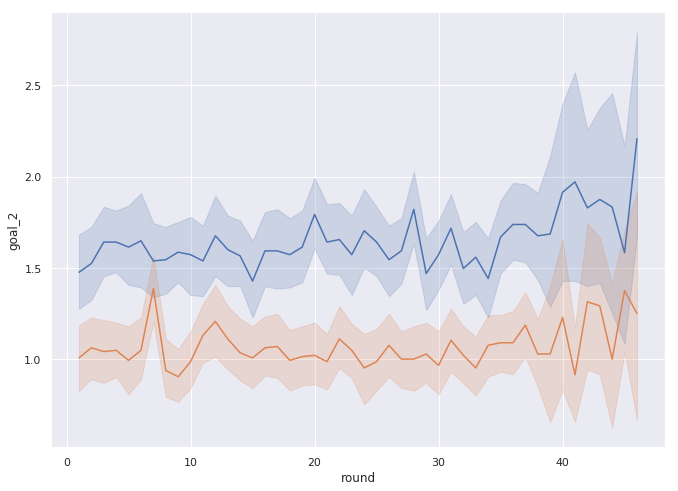

In [55]:
# Set the size of image plot
sns.set(rc={'figure.figsize':(11,8)})

# Also converting round columns as int
train_data['round'] = train_data['round'].astype(int)

ax = sns.lineplot(x="round", y="goal_1", data=train_data)
bx = sns.lineplot(x="round", y="goal_2", data=train_data)

This graphic shows the relation between goals along championship's rounds. __Blue line__ is the amount of goals when teams are playing at your "home stadium" and __orange line__ when they are playing at your "adversary stadium".

We can see that teams playing at "home" generally mark more goals than playing "out".

### __Top 5__: Teams with __most goals__ in Brasileirão (2003 until 2016)

,round,goal_1,goal_2,total_goals
team_1,,,,
Cruzeiro,5586,526,308,834
Santos,5601,523,263,786
São Paulo,5710,500,244,744
Fluminense,5573,439,302,741
Atlético MG,5250,455,283,738


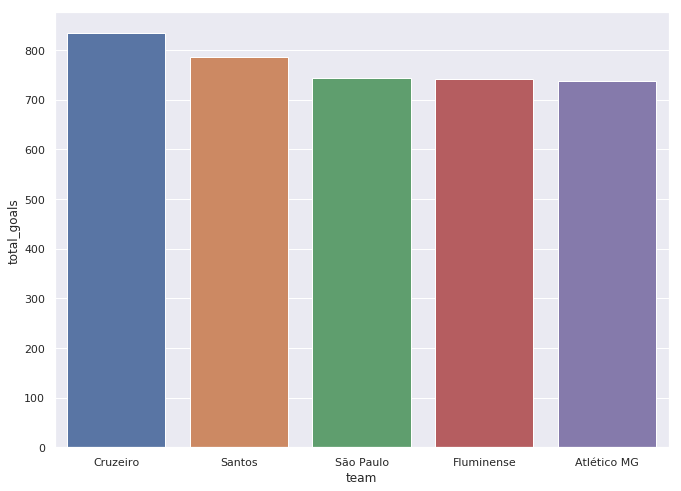

In [56]:
# Grouping our dataframe by team
gb_team = train_data.groupby(train_data.team_1).sum()
gb_team['total_goals'] = gb_team['goal_1'] + gb_team['goal_2']
gb_team = gb_team.sort_values(by='total_goals', ascending=False)
gb_team_top5 = gb_team.head()
gb_team_top5
gb_team_top5['team'] = gb_team_top5.index
ax = sns.barplot(x="team", y="total_goals", data=gb_team_top5)

### Amount of Goals per Year

,round,goal_1,goal_2,total_goals
date,,,,
2003,12972,982,610,1592
2004,13010,945,587,1532
2005,9933,835,617,1452
2006,7410,604,426,1030
2007,7410,634,413,1047
2008,7410,658,377,1035
2009,7410,659,435,1094
2010,7410,582,397,979
2011,7410,610,407,1017


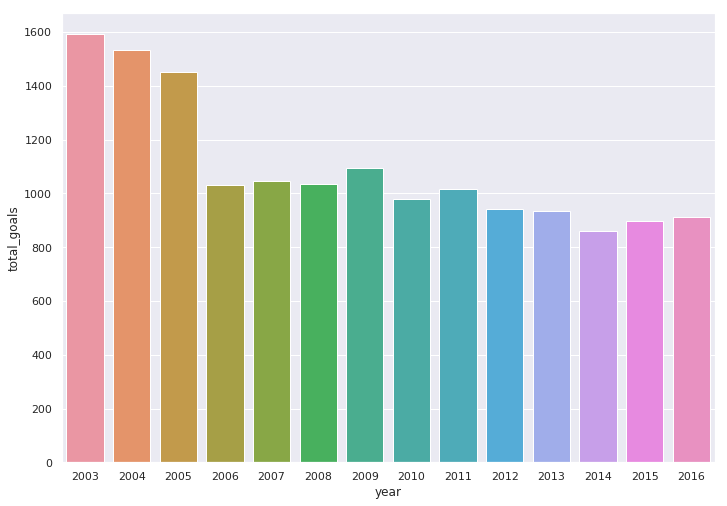

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Grouping our dataframe by year
gb_year = train_data.groupby(train_data.date.dt.year).sum()
gb_year['total_goals'] = gb_year['goal_1'] + gb_year['goal_2']
gb_year
gb_year['year'] = gb_year.index
ax = sns.barplot(x="year", y="total_goals", data=gb_year)


This graphic shows us the total amout of goals in the championship by year.

We note that 2003, 2004, 2005 have much more goals, but in these years the Brasileirãp Championship had much more rounds.
______

### Missing data
Now it's okay. Let's, checking how many missing data we have:

In [58]:
train_data.isnull().sum()
test_data.isnull().sum()

round          0
date           0
day_of_week    0
team_1         0
team_2         0
goal_1         0
goal_2         0
dtype: int64

round          0
date           0
day_of_week    0
team_1         0
team_2         0
goal_1         0
goal_2         0
dtype: int64

As we can see, there's not missing data. Good!

___
## Dealing with categorical features

In this section, I want to attack a classic problem for ML: __Deal with categorical features on dataset__.

Categorical data are common problems in many Data Science and Machine Learning approaches but are usually more challenging to deal with than numerical data. In particular, many machine learning algorithms require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms.

Therefore, I will create a few datasets with encoded categorical variables. There are a lot of techniques to encode this data, but I'm going to use:

- [__One-Hot Encoding__](http://contrib.scikit-learn.org/categorical-encoding/onehot.html): one column per category, with a 1 or 0 in each cell for if the row contained that column’s category
- [__Binary Encoding__](http://contrib.scikit-learn.org/categorical-encoding/binary.html): first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions that one-hot, but with some distortion of the distances.
- [__Backward Difference__](http://contrib.scikit-learn.org/categorical-encoding/backward_difference.html): the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

With these three encoding techniques, I will test all outputted datasets with some different models to evaluate what encoding technique better perfomed in our data.

_Note: For this activity, used [Category Encoders](http://contrib.scikit-learn.org/categorical-encoding/index.html), a python package._

___
Before encode our dataset, I want to extract more value as possible from the date feature: _data_. Have two approaches which make sense for us, extracting them from datetime feature:
- Day of the week
- Day of the year

However, we already got day of the week as a original column. Let's get the day of the year as a column.

In [59]:
# I'm going to create a new column called 'day_of_year' representing 
# a ordinal number of the day in that year.

train_data['day_of_year'] = train_data['date'].dt.dayofyear
train_data = train_data.drop(columns=['date'], axis=1)

test_data['day_of_year'] = test_data['date'].dt.dayofyear
test_data = test_data.drop(columns=['date'], axis=1)

## Lets start to encode our categorical variables:

# First we have to separate our training data from our target data (X, y):

X_train = train_data[['round', 'day_of_week', 'team_1', 'team_2', 'day_of_year']].copy()
y_train = train_data[['goal_1', 'goal_2']].copy()

X_test = test_data[['round', 'day_of_week', 'team_1', 'team_2', 'day_of_year']].copy()
y_test = test_data[['goal_1', 'goal_2']].copy()

import category_encoders as ce
cols = ['day_of_week', 'team_1', 'team_2']
one_hot_encoder = ce.OneHotEncoder(cols=cols, drop_invariant=True, use_cat_names=True)
binary_encoder = ce.BinaryEncoder(cols=cols, drop_invariant=True)
backward_encoder = ce.BackwardDifferenceEncoder(cols=cols)

# Fiting our encoders to the columns we told:
one_hot_encoder.fit(X_train)
binary_encoder.fit(X_train)
backward_encoder.fit(X_train)

# Encoding our dataset:
X_train_hot_encoded = one_hot_encoder.transform(X_train)
X_train_binary_encoded = binary_encoder.transform(X_train)
X_train_backward_encoded = backward_encoder.transform(X_train)

X_test_hot_encoded = one_hot_encoder.transform(X_test)
X_test_binary_encoded = binary_encoder.transform(X_test)
X_test_backward_encoded = backward_encoder.transform(X_test)

#Dropping intercept column
X_test_backward_encoded = X_test_backward_encoded.drop('intercept', axis=1)
X_train_backward_encoded = X_train_backward_encoded.drop('intercept', axis=1)

# Suffling the datset's rows:
from sklearn.utils import shuffle
X_train_hot_encoded, X_train_binary_encoded, X_train_backward_encoded = shuffle(X_train_hot_encoded, X_train_binary_encoded, X_train_backward_encoded, random_state=0)
X_test_hot_encoded, X_test_binary_encoded, X_test_backward_encoded = shuffle(X_test_hot_encoded, X_test_binary_encoded, X_test_backward_encoded, random_state=1)

encoding_names = ['One Hot', 'Binary', 'Backward Difference']
train_datasets_list = [X_train_hot_encoded, X_train_binary_encoded, X_train_backward_encoded]
test_datasets_list = [X_test_hot_encoded, X_test_binary_encoded, X_test_backward_encoded]

OneHotEncoder(cols=['day_of_week', 'team_1', 'team_2'], drop_invariant=True,
       handle_unknown='impute', impute_missing=True, return_df=True,
       use_cat_names=True, verbose=0)

BinaryEncoder(cols=['day_of_week', 'team_1', 'team_2'], drop_invariant=True,
       handle_unknown='impute', impute_missing=True, return_df=True,
       verbose=0)

BackwardDifferenceEncoder(cols=['day_of_week', 'team_1', 'team_2'],
             drop_invariant=False, handle_unknown='impute',
             impute_missing=True,
             mapping=[{'col': 'day_of_week', 'mapping':       [D.1]     [D.2]     [D.3]     [D.4]     [D.5]     [D.6]
1 -0.857143 -0.714286 -0.571429 -0.428571 -0.285714 -0.142857
2  0.142857 -0.714286 -0.571429 -0.428571 -0.285714 -0.142857
3  0.142857  0.285714 -0.571429 -0.428571 -0.285714 -0.142857
4  0.1428....979592
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

[50 rows x 48 columns]}],
             return_df=True, verbose=0)

### Analyzing dimension of categorical encoders

Before put the hands on the models and metrics, I want to analyze __how many columns__ each encoding have created to our features.

In [60]:
X_test_hot_encoded.shape
X_test_binary_encoded.shape
X_test_backward_encoded.shape

(285, 106)

(285, 17)

(285, 103)

- One hot encoding: 106 columns
- Binary encoding: 17 columns
- Backward encoding: 104 columns

Binary incredibly leave our dataset with 17 columns. Impressive difference to the others, let's check the efficiency.
___

## Taking a look at the models

It is always hard choosing a model, because isn't always predictable how it's going to perform. I will try to be more general as possible about the kind of ML models to evaluate.

To choose the models to evaluate, I'm following the methodology below:
    - Select some supervized models (based on scikit-learn API);
    - Select distributed model categories (Ensemble methods, Linear models, Tree models, etc);
    - Tuning the hyper-parameters with Exhaustive Grid Search technique.
And of course, to evaluate model's score I'm going to use [_regression metrics_](https://scikit-learn.org/stable/modules/classes.html#regression-metrics), and wont use Cross Validation techniques because our train (2003-2016 year matches results) and test (2017 year matches results) models are already defined:
    - Mean squared error (MSE): it represents the sample standard deviation of the differences between predicted values and observed values;
    
    - Mean absolute error (MAE): is the average of the absolute difference between the predicted values and observed value;
    
    - R2 and Adjusted R2: are often used for explanatory purposes and explains how well your selected independent variable(s) explain the variability in your dependent variable(s).
_Note_: The last metrics (R2 and Adjusted R2) were based and used with the implementation (below) of this [article](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4).

In [61]:
def R2_scores(X, y, yhat): # Following citted article's implementation
    #yhat = m.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    aux = np.true_divide(SS_Residual, SS_Total)
    r_squared = 1 - aux
    adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return r_squared, adj_r_squared

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

___
### Train and Test some models:

### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
scores = {}


for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]

    classifier = LinearRegression()
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

One Hoting encode:  {'mean_absolute_error': 0.8665058994670576, 'r2': array([-0.01698977,  0.02864947]), 'adjusted_r2': array([-0.62261289, -0.54979523]), 'mean_squared_error': 1.1621789366721993}

Binary Encoding:  {'mean_absolute_error': 0.8549778206125882, 'r2': array([-0.00729332,  0.0333793 ]), 'adjusted_r2': array([-0.07142811, -0.02816584]), 'mean_squared_error': 1.1536532283735048}

Backward Difference:  {'mean_absolute_error': 0.8665058994670585, 'r2': array([-0.01698977,  0.02864947]), 'adjusted_r2': array([-0.59571876, -0.52410801]), 'mean_squared_error': 1.162178936672199}


### Kernel Ridge

In [63]:
# Importing all machine learning models that I'm going to use:
from sklearn.kernel_ridge import KernelRidge

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = KernelRidge(alpha=1.0)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)
    
print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

One Hoting encode:  {'mean_absolute_error': 0.864105308931469, 'r2': array([-0.01003731,  0.0268691 ]), 'adjusted_r2': array([-0.61152021, -0.55263582]), 'mean_squared_error': 1.1589819403609265}

Binary Encoding:  {'mean_absolute_error': 0.8743613445587821, 'r2': array([-0.06734414,  0.00982695]), 'adjusted_r2': array([-0.13530238, -0.05321778]), 'mean_squared_error': 1.2032172152914125}

Backward Difference:  {'mean_absolute_error': 0.9351642398393953, 'r2': array([-0.26489012, -0.10565401]), 'adjusted_r2': array([-0.98468947, -0.73483834]), 'mean_squared_error': 1.3876924096476704}


### K Neighbors Regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = KNeighborsRegressor(n_neighbors=20)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

One Hoting encode:  {'mean_absolute_error': 0.8945614035087722, 'r2': array([-0.1012233 , -0.00790207]), 'adjusted_r2': array([-0.75700797, -0.60811342]), 'mean_squared_error': 1.2336842105263164}

Binary Encoding:  {'mean_absolute_error': 0.8899122807017543, 'r2': array([-0.10078777,  0.00568732]), 'adjusted_r2': array([-0.17087539, -0.05762097]), 'mean_squared_error': 1.2257587719298249}

Backward Difference:  {'mean_absolute_error': 0.8960526315789472, 'r2': array([-0.10310334, -0.01985016]), 'adjusted_r2': array([-0.73083618, -0.60020688]), 'mean_squared_error': 1.2415570175438586}


### Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = DecisionTreeRegressor(max_depth=5)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

One Hoting encode:  {'mean_absolute_error': 0.885878947592162, 'r2': array([-0.14516971, -0.10124489]), 'adjusted_r2': array([-0.8271247 , -0.75704241]), 'mean_squared_error': 1.312868367633238}

Binary Encoding:  {'mean_absolute_error': 0.8699298139335812, 'r2': array([-0.03803856,  0.02808315]), 'adjusted_r2': array([-0.1041309, -0.0337992]), 'mean_squared_error': 1.175216443912341}

Backward Difference:  {'mean_absolute_error': 0.8793525718213568, 'r2': array([-0.0591947 ,  0.00388539]), 'adjusted_r2': array([-0.66194086, -0.56296436]), 'mean_squared_error': 1.2016432283944476}


### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = MultiOutputRegressor(GradientBoostingRegressor(max_depth=5)).fit(X_train, y_train)

    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

One Hoting encode:  {'mean_absolute_error': 0.8808701622203408, 'r2': array([-0.03781284, -0.05766541]), 'adjusted_r2': array([-0.65583621, -0.6875111 ]), 'mean_squared_error': 1.22342875716745}

Binary Encoding:  {'mean_absolute_error': 0.9007059880909533, 'r2': array([-0.09817295, -0.02437462]), 'adjusted_r2': array([-0.16809407, -0.08959697]), 'mean_squared_error': 1.2411290353648028}

Backward Difference:  {'mean_absolute_error': 0.8784447244956604, 'r2': array([-0.02869624, -0.01490436]), 'adjusted_r2': array([-0.61408692, -0.59244661]), 'mean_squared_error': 1.1938097778793288}


### MLP Regressor

In [67]:
from sklearn.neural_network import MLPRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = MLPRegressor()
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

One Hoting encode:  {'mean_absolute_error': 0.9136833409823252, 'r2': array([-0.05242749, -0.03679811]), 'adjusted_r2': array([-0.67915397, -0.6542172 ]), 'mean_squared_error': 1.2204934072242535}

Binary Encoding:  {'mean_absolute_error': 0.846750057237824, 'r2': array([-0.00285809,  0.02867561]), 'adjusted_r2': array([-0.06671048, -0.03316901]), 'mean_squared_error': 1.1536254897799654}

Backward Difference:  {'mean_absolute_error': 0.885242730018903, 'r2': array([-0.04875683, -0.02714831]), 'adjusted_r2': array([-0.6455632 , -0.61165812]), 'mean_squared_error': 1.2128345381592838}


#### __Conclusion__:

We observed here a similar effectiveness of the models with the differents categorical encodings, however it's clear that One Hot Encoding is the one with worst performance of the three that I choose to apply on datasets. I would say that the best metric score to choose and validate this models is Mean Absolute Error (MAE), because it is less affected by outlier errors and have easy interpretion whereas it is the absolute distance of what were predicted and what is the true value. After this one, Adjusted R^2.

Due to this, we got Linear Regression, Decision Tree Regressor and MLP as best models comparing your MAE to the others.

## Feature Engineering / Feature Selection

In this section I will only apply normalization to _round_ feature and test if our perfomance get higher. 

In [68]:
# Apply normalization on "round" column
from sklearn.preprocessing import MinMaxScaler 

for i in range(len(train_datasets_list)):
    min_max_scaler = MinMaxScaler()
    x = train_datasets_list[i][['round']].values.astype(float)
    x2 = test_datasets_list[i][['round']].values.astype(float)
    
    x_scaled = min_max_scaler.fit_transform(x)
    x2_scaled = min_max_scaler.fit_transform(x2)
    
    train_datasets_list[i][['round']] = x_scaled
    test_datasets_list[i][['round']] = x2_scaled

## Final model evaluation and selection

I'm going to evaluate the models again with _round_ normalized.

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
scores = {}


for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]

    classifier = LinearRegression()
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

One Hoting encode:  {'mean_absolute_error': 0.8675172777399809, 'r2': array([-0.01830628,  0.02845504]), 'adjusted_r2': array([-0.62471339, -0.55010544]), 'mean_squared_error': 1.163084029801543}

Binary Encoding:  {'mean_absolute_error': 0.8566335588761474, 'r2': array([-0.00827523,  0.03288854]), 'adjusted_r2': array([-0.07247253, -0.02868785]), 'mean_squared_error': 1.154523234373043}

Backward Difference:  {'mean_absolute_error': 0.8675172777399817, 'r2': array([-0.01830628,  0.02845504]), 'adjusted_r2': array([-0.59778443, -0.52441309]), 'mean_squared_error': 1.1630840298015444}


### Kernel Ridge

In [70]:
# Importing all machine learning models that I'm going to use:
from sklearn.kernel_ridge import KernelRidge

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = KernelRidge(alpha=1.0)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)
    
print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

One Hoting encode:  {'mean_absolute_error': 0.8651085222324789, 'r2': array([-0.01135471,  0.02680126]), 'adjusted_r2': array([-0.61362212, -0.55274406]), 'mean_squared_error': 1.159816197106988}

Binary Encoding:  {'mean_absolute_error': 0.8782102959180886, 'r2': array([-0.07435467,  0.00796811]), 'adjusted_r2': array([-0.14275928, -0.05519497]), 'mean_squared_error': 1.2085012450752501}

Backward Difference:  {'mean_absolute_error': 0.9371606532979186, 'r2': array([-0.26845915, -0.1046884 ]), 'adjusted_r2': array([-0.99028949, -0.73332323]), 'mean_squared_error': 1.3893044493398752}


### K Neighbors Regressor

In [71]:
from sklearn.neighbors import KNeighborsRegressor
scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = KNeighborsRegressor(n_neighbors=20)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

One Hoting encode:  {'mean_absolute_error': 0.8914912280701757, 'r2': array([-0.11505138,  0.02361723]), 'adjusted_r2': array([-0.77907075, -0.55782419]), 'mean_squared_error': 1.2242675438596482}

Binary Encoding:  {'mean_absolute_error': 0.892105263157895, 'r2': array([-0.08510143, -0.0187378 ]), 'adjusted_r2': array([-0.15419029, -0.08360126]), 'mean_squared_error': 1.2300526315789475}

Backward Difference:  {'mean_absolute_error': 0.9058771929824563, 'r2': array([-0.13429456, -0.0368933 ]), 'adjusted_r2': array([-0.77977709, -0.6269486 ]), 'mean_squared_error': 1.270013157894737}


### Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = DecisionTreeRegressor(max_depth=5)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

One Hoting encode:  {'mean_absolute_error': 0.8895772408634741, 'r2': array([-0.14939276, -0.09976235]), 'adjusted_r2': array([-0.83386261, -0.75467701]), 'mean_squared_error': 1.314584123405401}

Binary Encoding:  {'mean_absolute_error': 0.8841905585450334, 'r2': array([-0.06440612,  0.01331262]), 'adjusted_r2': array([-0.13217729, -0.04951017]), 'mean_squared_error': 1.1994766195845372}

Backward Difference:  {'mean_absolute_error': 0.8812467570340801, 'r2': array([-0.06405833,  0.0085027 ]), 'adjusted_r2': array([-0.66957218, -0.55571952]), 'mean_squared_error': 1.2019785140434007}


### Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = MultiOutputRegressor(GradientBoostingRegressor(max_depth=5)).fit(X_train, y_train)

    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

One Hoting encode:  {'mean_absolute_error': 0.8874451824159656, 'r2': array([-0.07352434, -0.06569922]), 'adjusted_r2': array([-0.71281412, -0.70032909]), 'mean_squared_error': 1.24953632214936}

Binary Encoding:  {'mean_absolute_error': 0.9105674600316065, 'r2': array([-0.12836261, -0.04360164]), 'adjusted_r2': array([-0.20020593, -0.11004819]), 'mean_squared_error': 1.2702113855763664}

Backward Difference:  {'mean_absolute_error': 0.8999779444558806, 'r2': array([-0.09756557, -0.04892802]), 'adjusted_r2': array([-0.72214709, -0.6458318 ]), 'mean_squared_error': 1.2546063009976876}


### MLP Regressor

In [74]:
from sklearn.neural_network import MLPRegressor

scores = {}

for i in range(len(train_datasets_list)):
    scores[encoding_names[i]] = {'r2': -999}
    scores[encoding_names[i]] = {'adjusted_r2': -999}
    scores[encoding_names[i]] = {'mean_squared_error': -999}
    scores[encoding_names[i]] = {'mean_absolute_error': -999}
    
    X_train, X_test = train_datasets_list[i], test_datasets_list[i]
    
    classifier = MLPRegressor()
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting score matches of 2017
    predicteds = classifier.predict(X_test)
    
    r2_scores = R2_scores(X_test, y_test.values, predicteds)
    scores[encoding_names[i]]['r2'] = r2_scores[0]
    scores[encoding_names[i]]['adjusted_r2'] = r2_scores[1]
    scores[encoding_names[i]]['mean_squared_error'] = mean_squared_error(y_test, predicteds)
    scores[encoding_names[i]]['mean_absolute_error'] = mean_absolute_error(y_test, predicteds)

print('One Hoting encode: ', scores['One Hot'])
print()
print('Binary Encoding: ', scores['Binary'])
print()
print('Backward Difference: ', scores['Backward Difference'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

One Hoting encode:  {'mean_absolute_error': 0.8836667079946706, 'r2': array([-0.08133406,  0.01125241]), 'adjusted_r2': array([-0.72527457, -0.57755233]), 'mean_squared_error': 1.210866527444686}

Binary Encoding:  {'mean_absolute_error': 0.8680294402613362, 'r2': array([0.01054831, 0.01234313]), 'adjusted_r2': array([-0.05245049, -0.05054139]), 'mean_squared_error': 1.1547339652721}

Backward Difference:  {'mean_absolute_error': 0.9079051100855184, 'r2': array([-0.14899189, -0.05766617]), 'adjusted_r2': array([-0.8028381, -0.6595425]), 'mean_squared_error': 1.2906062809405856}


### __Conclusion__:

With _round_  feature normalized almost nothing has changed, but overall our performance get little bit lower.

_____

### Saving our final model to put in production:

To save our trained model to put in production we can save it as a [pickle](https://docs.python.org/3/library/pickle.html), and load after.

## Conclusion

Well, our best MAE was about 0.84 ~ 0.86 with Decision Tree, MLP and Linear regressions models using principally Binary and Backward Difference for categorical encoding. I would choose __Binary Encoding__ as categorical encoding to production because their scores was almost the same and Binary make our dataset with much less dimensions as we have see before.

### How improve the model?

This section is only to talk about __how we could improve our model__. There is a few things which we could do to get a better performance at predicting football matches scores considering our current dataset:
- We could do feature engineering, generating new features with the current ones
- We could do a better hyperparameter tuning, I've did just a manually one with the models
- And finnaly, collect more features! More features probably will generate a more robust model. Metrics such as team's name, name of the stadium that is going on the football match, how many players were substituted during the game, how many cards, how many minutes, etc. Are infinite the number of features we could collect to improve our model